# Descripción del Proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


# Tabla de contenido

- [Instrucciones para completar el proyecto](#instrucciones-para-completar-el-proyecto)
- [Paso 2. Prepara los datos](#paso-2-prepara-los-datos)
- [Paso 3. Analiza los datos](#paso-3-analiza-los-datos)
- [Paso 4. Crea un perfil de usuario para cada región](#paso-4-crea-un-perfil-de-usuario-para-cada-región)
- [Paso 5. Prueba las siguientes hipótesis](#paso-5-prueba-las-siguientes-hipótesis)
- [Paso 6. Escribe una conclusión general](#paso-6-escribe-una-conclusión-general)
- [Explicaciones](#explicaciones)

# Introducción

La tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.

Vamos a identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Tenemos datos que se remontan a 2016, es diciembre de 2016 y se planea una campaña para 2017.

El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Abre el archivo de datos y estudia la información general


In [1]:
import pandas as pd

import numpy as np

import math

import os

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

In [2]:
df_general= pd.read_csv('/datasets/games.csv')

In [3]:
print(df_general.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
display(df_general.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Paso 2. Prepara los datos


In [5]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
df_general.columns = df_general.columns.str.lower()
display(df_general.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#Convierte los datos en los tipos necesarios.
#Year_of_Release to int
df_general['year_of_release'] = df_general['year_of_release'].fillna(0).astype(int)

In [7]:
df_general['user_score'] = df_general['user_score'].replace('tbd', np.nan)
df_general['user_score'] = df_general['user_score'].astype(float)

### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.


Convertimos la columna year_of_release a numeros enteros, pues no tiene sentido el .0 ademas se vuelve mas practico el analisis de los datos

In [8]:
#Si es necesario, elige la manera de tratar los valores ausentes:
print(df_general['user_score'].head(10))

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
5    NaN
6    8.5
7    6.6
8    8.4
9    NaN
Name: user_score, dtype: float64


In [9]:
#valores faltantes
df_general['user_score_missing'] = df_general['user_score'].isnull()

#total
df_general['total_values'] = len(df_general)

# porcentaje de valores faltantes
df_general['missing_percent'] = df_general['user_score'].isnull().sum() / len(df_general) * 100

display(df_general.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_missing,total_values,missing_percent
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,16715,54.591684
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,True,16715,54.591684
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,16715,54.591684
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,16715,54.591684
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,True,16715,54.591684


|          | missing | total  | percent  |
|----------|---------|--------|----------|
| Critic_Score   | 8,578   | 16,715 | 51.32%   |
| Rating   | 6,766   | 16,715 | 40.48%   |
| User_Score | 6,701   | 16,715 | 40.09%   |
| Year_of_Release   | 269     | 16,715 | 1.61%    |
| Name     | 2       | 16,715 | 0.01%    |
| Genre    | 2       | 16,715 | 0.01%    |
| Platform | 0       | 16,715 | 0.00%    |
| NA_sales | 0       | 16,715 | 0.00%    |
| EU_sales | 0       | 16,715 | 0.00%    |
| JP_sales | 0       | 16,715 | 0.00%    |
| Other_sales | 0     | 16,715 | 0.00%    |


Rellenamos valores ausente con la media de la columna para facilitar el manejo de los datos en procesos posteriores

In [10]:
#Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

df_general['critic_score'] = df_general['critic_score'].fillna(df_general['critic_score'].mean())
user_score_mean = df_general['user_score'].mean()
df_general['user_score'] = df_general['user_score'].fillna(user_score_mean)

In [11]:
print(df_general.isna().sum())

name                     2
platform                 0
year_of_release          0
genre                    2
na_sales                 0
eu_sales                 0
jp_sales                 0
other_sales              0
critic_score             0
user_score               0
rating                6766
user_score_missing       0
total_values             0
missing_percent          0
dtype: int64


In [12]:
print(df_general.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16713 non-null  object 
 1   platform            16715 non-null  object 
 2   year_of_release     16715 non-null  int64  
 3   genre               16713 non-null  object 
 4   na_sales            16715 non-null  float64
 5   eu_sales            16715 non-null  float64
 6   jp_sales            16715 non-null  float64
 7   other_sales         16715 non-null  float64
 8   critic_score        16715 non-null  float64
 9   user_score          16715 non-null  float64
 10  rating              9949 non-null   object 
 11  user_score_missing  16715 non-null  bool   
 12  total_values        16715 non-null  int64  
 13  missing_percent     16715 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 1.7+ MB
None


In [13]:
print(df_general.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45     76.000000    8.000000      E   
1      3.58      6.81         0.77     68.967679    7.125046    NaN   
2     12.76      3.79         3.29     82.000000    8.300000      E   
3     10.93      3.28         2.95     80.000000    8.000000      E   
4      8.89     10.22         1.00     68.967679    7.125046    NaN   

   user_score_missing  total_values  missing_percent  
0               False         1

### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.


los valores pudieran estar ausentes por algun detalle en que los usuarios simplemente no calificaron el juego

### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.


Considero que mas tarde no va a afectar el analisis por ello decidi dejarlo tal cual está

In [14]:
#Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
df_general['total_sales'] = df_general['eu_sales'] + df_general['jp_sales'] + df_general['na_sales'] + df_general['other_sales']
print(df_general['total_sales'].head())

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64


# Paso 3. Analiza los datos


In [15]:
#Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
year_counts = df_general.groupby('year_of_release').size()
print(year_counts)

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
dtype: int64


In [16]:
n = len(df_general['year_of_release'])

bins = 1 + math.log2(n)

bins = int(round(bins))

print("Número de bins según la regla de Sturges:", bins)

Número de bins según la regla de Sturges: 15


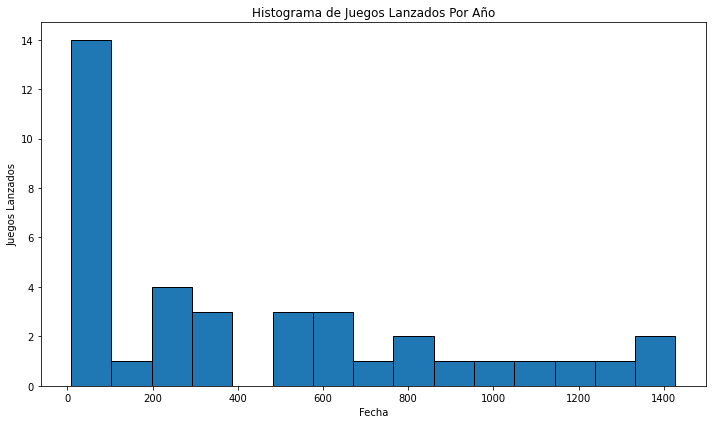

In [17]:
# Hist Juegos
plt.figure(figsize=(10, 6))
plt.hist(year_counts, bins, edgecolor='black')
plt.xlabel('Fecha')
plt.ylabel('Juegos Lanzados')
plt.title('Histograma de Juegos Lanzados Por Año')
plt.tight_layout()  # ajustar el tamaño de tus gráficas 
plt.show()

Podemos ver que el año 0 tuvo bastantes ventas, sin embargo fueron juegos que tenian asignado directamente el valor 0, a fecha con mas ventas seria en el 200 y la fecha mas escasa en el 400

### Observa cómo varían las ventas de una plataforma a otra. 

In [18]:
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 
platform_sales = df_general.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [19]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
no_sales = df_general[df_general['total_sales'] == 0]
platform_counts = no_sales.groupby('platform').size()
no_sales_popular_platforms = platform_counts[platform_counts > 0].index
popular_platforms_no_sales = df_general[df_general['platform'].isin(no_sales_popular_platforms)]['platform'].unique()

print(popular_platforms_no_sales)


['PS3' 'PS2']


Ademas podemos notar que las plataformas PS3 y PS2 solian tener muchas ventas y ser populares pero ahora no

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


In [20]:
max_year = df_general['year_of_release'].max()
min_year = 1980
years_appearance = max_year - min_year

current_year = 2023
years_disappearance = current_year - max_year

print("Tiempo de aparición de nuevas plataformas: ", years_appearance, " años")
print("Tiempo de desaparición de antiguas plataformas: ", years_disappearance, " años")


Tiempo de aparición de nuevas plataformas:  36  años
Tiempo de desaparición de antiguas plataformas:  7  años


In [21]:
import pandas as pd

max_year = df_general['year_of_release'].max()
min_year = 1980
years_appearance = max_year - min_year

current_year = 2023
years_disappearance = current_year - max_year

# Crear DataFrame con los datos
data = {
    'Indicador': ['Tiempo de aparición', 'Tiempo de desaparición'],
    'Años': [years_appearance, years_disappearance]
}

df_pivot = pd.DataFrame(data)

# Crear la tabla pivotante
pivot_table = pd.pivot_table(df_pivot, values='Años', index='Indicador')

print(pivot_table)


                        Años
Indicador                   
Tiempo de aparición       36
Tiempo de desaparición     7


<img src="https://i.ibb.co/rcwbrGK/grafica.png">

### Determina para qué período debes tomar datos. Los datos deberían permitirte construir un modelo para 2017.

In [22]:
#Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
model_2017 = df_general[(df_general['year_of_release'] >= 2013) & (df_general['year_of_release'] <= 2017)]


### ¿Qué plataformas son líderes en ventas? 

In [23]:
platform_sales = model_2017.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


### ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.


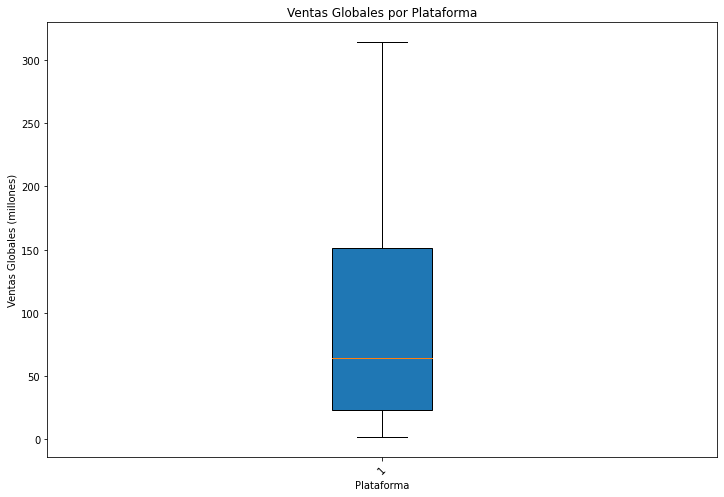

In [24]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.


plt.figure(figsize=(12, 8))
plt.boxplot(model_2017.groupby('platform')['total_sales'].sum(), patch_artist=True)
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

In [25]:
box_data=model_2017.groupby('platform')['total_sales'].sum()
print(box_data)

platform
3DS     143.25
DS        1.54
PC       39.43
PS3     181.43
PS4     314.14
PSP       3.50
PSV      32.99
Wii      13.66
WiiU     64.63
X360    136.80
XOne    159.32
Name: total_sales, dtype: float64


platform
3DS     AxesSubplot(0.125,0.125;0.775x0.755)
DS      AxesSubplot(0.125,0.125;0.775x0.755)
PC      AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
PSP     AxesSubplot(0.125,0.125;0.775x0.755)
PSV     AxesSubplot(0.125,0.125;0.775x0.755)
Wii     AxesSubplot(0.125,0.125;0.775x0.755)
WiiU    AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
XOne    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

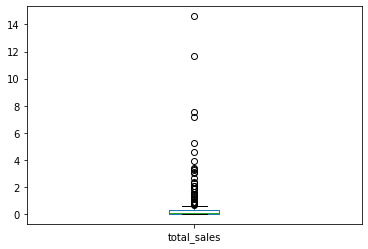

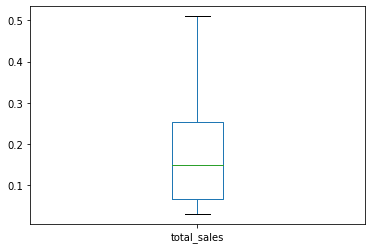

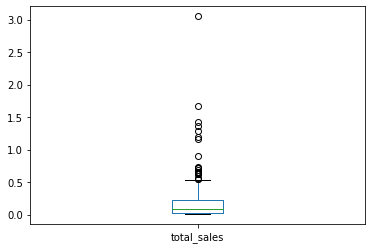

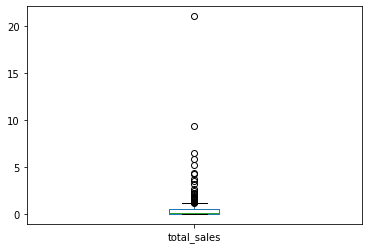

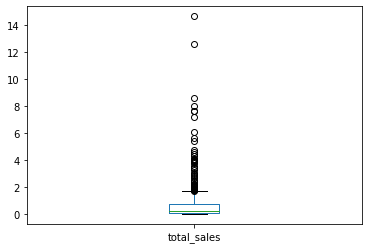

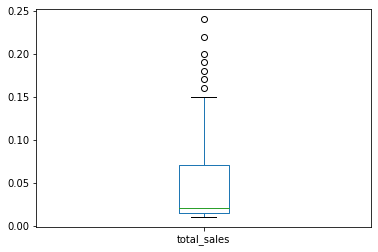

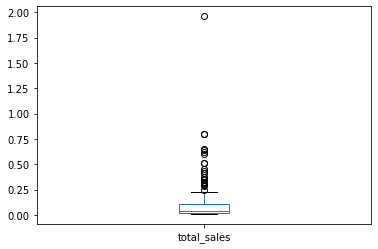

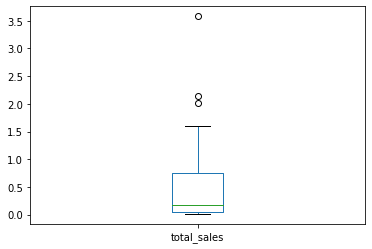

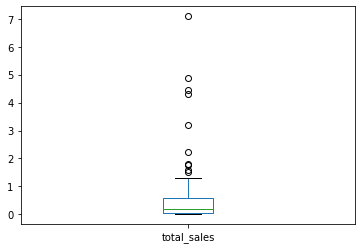

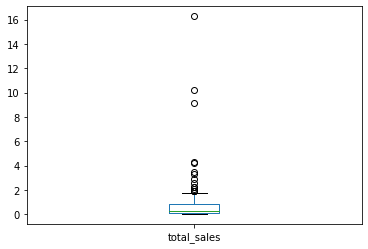

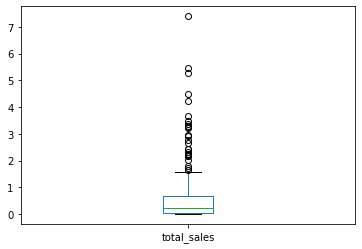

In [26]:
model_2017[['total_sales','platform']].groupby('platform').plot(kind='box')

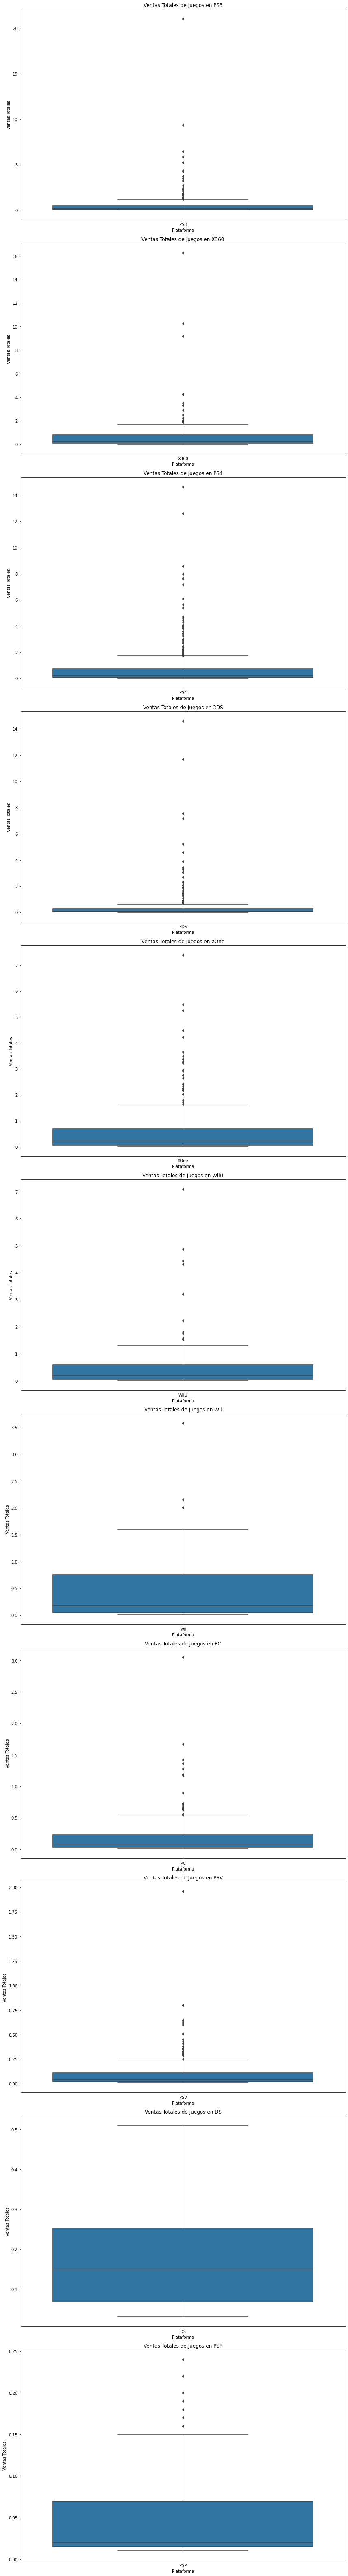

In [27]:

platforms = model_2017['platform'].unique()
fig, axes = plt.subplots(len(platforms), 1, figsize=(12, 8 * len(platforms)))

for i, platform in enumerate(platforms):
    data = model_2017[model_2017['platform'] == platform]
    ax = axes[i]
    sns.boxplot(data=data, x='platform', y='total_sales', ax=ax)
    ax.set_title(f'Ventas Totales de Juegos en {platform}')
    ax.set_xlabel('Plataforma')
    ax.set_ylabel('Ventas Totales')
    ax.set_xticklabels([platform])  

plt.tight_layout()
plt.show()

¿Son significativas las diferencias en las ventas? Si
¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
La plataforma lider PS4 casi duplica a las demas PS3 X One  3Ds 360

In [28]:
#Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
df_pc = model_2017[model_2017['platform'] == 'PC']
correlation_matrix = df_pc[['user_score', 'critic_score', 'total_sales']].corr()
print(correlation_matrix)


              user_score  critic_score  total_sales
user_score      1.000000      0.346371    -0.108650
critic_score    0.346371      1.000000     0.215447
total_sales    -0.108650      0.215447     1.000000


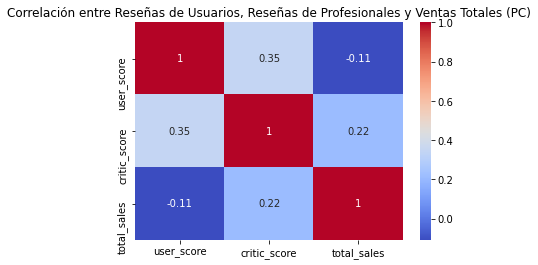

In [29]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Reseñas de Usuarios, Reseñas de Profesionales y Ventas Totales (PC)')
plt.show()


Correlación: 0.07199097239329379


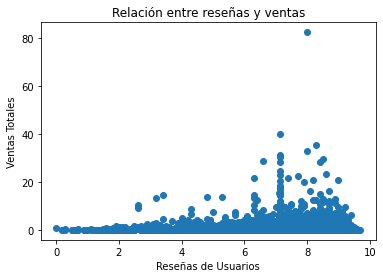

In [30]:
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 
plt.scatter(df_general['user_score'], df_general['total_sales'])
plt.title('Relación entre reseñas y ventas')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales')

correlation = np.corrcoef(df_general['user_score'], df_general['total_sales'])[0, 1]
print('Correlación:', correlation)

plt.show()

### Saca conclusiones


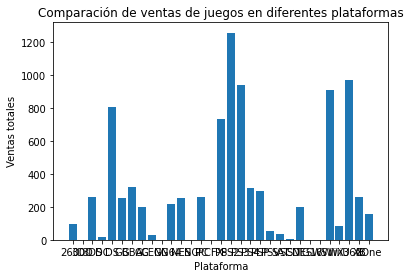

In [31]:
#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
plt.bar(df_general.groupby('platform')['total_sales'].sum().index, df_general.groupby('platform')['total_sales'].sum().values)
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Comparación de ventas de juegos en diferentes plataformas')
plt.show()

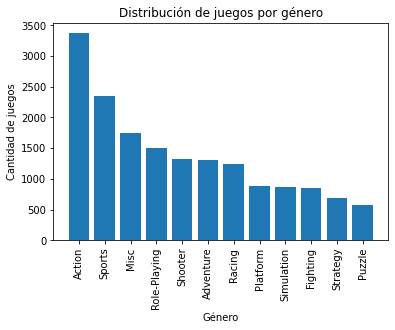

In [32]:
#Echa un vistazo a la distribución general de los juegos por género. 
genre_counts = df_general['genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Género')
plt.ylabel('Cantidad de juegos')
plt.title('Distribución de juegos por género')
plt.xticks(rotation=90)
plt.show()

### ¿Qué se puede decir de los géneros más rentables? 

La tabla anterior nos indica que el genero mas rentable es accion y deportes mientras que los menos rentales seria strategy y puzzle

### ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Si, directamente los generos mas populares son aquellos relacionado con accion y los menos relacionados con puzzles

# Paso 4. Crea un perfil de usuario para cada región



### Para cada región (NA, UE, JP) determina:


In [33]:
#Las cinco plataformas principales.
na_platform = df_general.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


In [34]:
#Las cinco plataformas principales.
eu_platform = df_general.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


In [35]:
#Las cinco plataformas principales.
jp_platform = df_general.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


### Describe las variaciones en sus cuotas de mercado de una región a otra.

In [36]:
#Los cinco géneros principales. 
na_genres = df_general.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


In [37]:
#Los cinco géneros principales. 
eu_genres = df_general.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


In [38]:
#Los cinco géneros principales. 
jp_genres = df_general.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


### Explica la diferencia.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [39]:
#Los cinco géneros principales. 
na_rating = df_general.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


In [40]:
#Los cinco géneros principales. 
eu_rating = df_general.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


In [41]:
#Los cinco géneros principales. 
jp_rating = df_general.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(platform_sales.head())

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64


No, las clasificaciones no parecen afectar las ventas

# Paso 5. Prueba las siguientes hipótesis:


### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [42]:
rating_xbox_one = df_general[df_general['platform'] == 'XOne']['user_score'].mean()
print(rating_xbox_one)


6.680275292975521


In [43]:
rating_pc = df_general[df_general['platform'] == 'PC']['user_score'].mean()
print(rating_pc)


7.075574339953413


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [44]:
print(df_general['genre'].unique())


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [45]:
rating_action = df_general[df_general['genre'] == 'Action']['user_score'].mean()
print(rating_action)


7.086478470875465


In [46]:
rating_sport = df_general[df_general['genre'] == 'Sports']['user_score'].mean()
print(rating_sport)


7.0480759842705245


### Establece tu mismo el valor de umbral alfa.


In [47]:
from scipy.stats import ttest_ind

In [48]:
pc_hipotesis= df_general[df_general['platform'] == 'PC']['user_score'] # Ojo con esto
xbox_one_hipotesis = df_general[df_general['platform'] == 'XOne']['user_score'] # Ojo con esto

statistic, pvalue = ttest_ind(pc_hipotesis, xbox_one_hipotesis)

print("Estadística de prueba:", statistic)
print("Valor p:", pvalue)

alpha = 0.05
if pvalue < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en el rating.")
else:
    print("No se puede rechazar la hipótesis nula. No se encuentra evidencia suficiente de una diferencia significativa en el ratng.")

Estadística de prueba: 4.165220224005854
Valor p: 3.329648256313532e-05
Se rechaza la hipótesis nula. Existe una diferencia significativa en el rating.


In [49]:
hipotesis_action = df_general[df_general['genre'] == 'Action']['user_score']
hipotesis_sport = df_general[df_general['genre'] == 'Sports']['user_score']

statistic, pvalue = ttest_ind(hipotesis_action, hipotesis_sport, nan_policy='omit')

print("Estadística de prueba:", statistic)
print("Valor p:", pvalue)

alpha = 0.05
if pvalue < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en el rating.")
else:
    print("No se puede rechazar la hipótesis nula. No se encuentra evidencia suficiente de una diferencia significativa en el ratng.")

Estadística de prueba: 1.3295310541845122
Valor p: 0.18372589312608184
No se puede rechazar la hipótesis nula. No se encuentra evidencia suficiente de una diferencia significativa en el ratng.


# Explicaciones:


### Cómo formulaste las hipótesis nula y alternativa.


Con base a los promedios de generos y plataformas para posteriormente compararlos

### Qué criterio utilizaste para probar las hipótesis y por qué


se utilizo la hipotesis estadistica con el fin de evaluar la evidencia con la hipotesis nula

# Paso 6. Escribe una conclusión general

Las plataformas lideres en venta son la PS4, PS3, Xbox One, 3Ds y Xbox 360
Las plataformas con menos ventas son PCFX, GG, 3DO y TG1
Siendo los generos mas rentables los de accion y de deportes
Los menos rentables son strategy y puzzle